#CNN Architecture | Assignment

1. What is the role of filters and feature maps in Convolutional Neural
Network (CNN)?
   - In a **Convolutional Neural Network (CNN)**, **filters** and **feature maps** play a vital role in automatically extracting important features from input data such as images. Filters, also known as kernels, are small matrices that slide over the input image to detect specific patterns like edges, textures, or colors through a mathematical operation called convolution. Each filter learns to recognize a different feature during the training process. The result of this convolution operation is a **feature map**, which highlights the locations and strengths of the detected features in the image. These feature maps are then passed through activation functions (like ReLU) and pooling layers to retain the most important information while reducing dimensionality. Together, filters and feature maps enable CNNs to progressively learn hierarchical patterns — from simple edges in early layers to complex shapes and objects in deeper layers — making them highly effective for tasks like image classification and object detection.

   

2. Explain the concepts of padding and stride in CNNs(Convolutional Neural
Network). How do they affect the output dimensions of feature maps?
   - In a Convolutional Neural Network (CNN), **padding** and **stride** are two important parameters that control how a filter moves over the input and how the output feature map is shaped. **Padding** refers to adding extra pixels (usually zeros) around the edges of the input image to preserve its spatial dimensions after convolution. This helps prevent the loss of edge information and allows filters to fully cover the border areas. **Stride** determines how many pixels the filter moves or “slides” across the input at each step. A larger stride results in a smaller feature map because the filter covers fewer overlapping regions, while a smaller stride produces a larger feature map with more detailed spatial information. In summary, padding helps maintain output size, while stride controls how much the output is reduced after each convolution operation.



3. Define receptive field in the context of CNNs. Why is it important for deep
architectures?
   - In the context of Convolutional Neural Networks (CNNs), the **receptive field** refers to the specific region of the input image that a particular neuron in a layer “sees” or responds to. In other words, it is the area of the input that influences the neuron’s output. As we move deeper into the network, the receptive field of neurons increases because each layer combines information from larger portions of the previous layers. This means that higher-level neurons can capture more complex and global patterns, such as shapes or objects, rather than just simple edges or textures. The **receptive field is important** for deep architectures because it allows the network to integrate both local and global information, enabling better understanding of spatial hierarchies and relationships within the data — which is essential for tasks like object detection, image recognition, and scene understanding.


4. Discuss how filter size and stride influence the number of parameters in a
CNN.
   - In a Convolutional Neural Network (CNN), the **filter size** and **stride** both influence how the network processes data and how many parameters it contains. The **filter size** (for example, 3×3 or 5×5) determines how many weights each filter has — a larger filter means more parameters because each weight in the filter is learned during training. For instance, a 5×5 filter has 25 weights per input channel, while a 3×3 filter has only 9, making smaller filters more efficient and common in modern CNNs. On the other hand, the **stride** controls how far the filter moves over the input. While stride does not directly affect the number of parameters (since it doesn’t change the filter size), it influences the **output feature map size** — a larger stride produces smaller feature maps, reducing the overall number of activations and thus the computational cost of later layers. In summary, filter size affects the number of learned parameters, whereas stride mainly affects the spatial resolution and computational load of the network.


5. Compare and contrast different CNN-based architectures like LeNet,
AlexNet, and VGG in terms of depth, filter sizes, and performance.
   - **LeNet**, **AlexNet**, and **VGG** are three milestone CNN architectures that differ in depth, filter sizes, and overall performance. **LeNet-5**, one of the earliest CNNs, has a simple structure with only 5 to 7 layers, using small filters (5×5) and designed mainly for digit recognition tasks like MNIST. It introduced core CNN concepts such as convolution, pooling, and fully connected layers. **AlexNet**, which popularized deep learning in 2012, is much deeper with 8 layers (5 convolutional and 3 fully connected) and uses larger filters (11×11, 5×5, 3×3) in early layers. It also introduced techniques like ReLU activation, dropout, and GPU training, significantly improving performance on large-scale datasets like ImageNet. **VGGNet**, on the other hand, is much deeper, with 16 or 19 layers, and uses only small 3×3 filters throughout the network, stacked together to increase depth and non-linearity. This consistent filter size made the architecture simpler and more uniform while achieving very high accuracy. In summary, LeNet is shallow and designed for small images, AlexNet is deeper and more powerful for large-scale data, and VGG is even deeper with a uniform architecture, offering higher accuracy but at the cost of more computational resources.


6. Using keras, build and train a simple CNN model on the MNIST dataset
from scratch. Include code for module creation, compilation, training, and evaluation.
(Include your Python code and output in the code box below.)

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 - 44s - 52ms/step - accuracy: 0.9428 - loss: 0.1882 - val_accuracy: 0.9790 - val_loss: 0.0700
Epoch 2/5
844/844 - 46s - 54ms/step - accuracy: 0.9814 - loss: 0.0578 - val_accuracy: 0.9848 - val_loss: 0.0538
Epoch 3/5
844/844 - 79s - 94ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 4/5
844/844 - 46s - 54ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9898 - val_loss: 0.0361
Epoch 5/5
844/844 - 43s - 51ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9888 - val_loss: 0.0429
313/313 - 3s - 10ms/step - accuracy: 0.9881 - loss: 0.0338

Test Accuracy: 0.9881
Test Loss: 0.0338


7. : Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.

   (Include your Python code and output in the code box below.)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


/tmp/ipython-input-3884687206.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


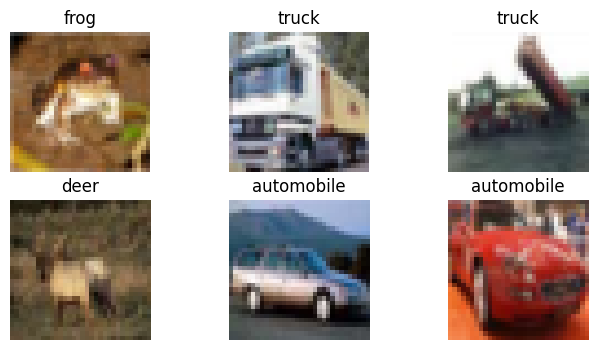

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 - 64s - 91ms/step - accuracy: 0.4377 - loss: 1.5460 - val_accuracy: 0.5364 - val_loss: 1.2873
Epoch 2/10


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# 2. Normalize pixel values (0–255) to (0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Display dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# 4. Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 5. Visualize a few sample images
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

# 6. Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 7. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 8. Display model summary
model.summary()

# 9. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=2)

# 10. Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 11. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


8. Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

   (Include your Python code and output in the code box below.)

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 2. Define transforms for normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 3. Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 4. Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 5. Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
print(model)

# 6. Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 8. Evaluate on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nTest Accuracy: {100 * correct / total:.2f}%")


9. Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.
  
    (Include your Python code and output in the code box below.)


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# 1. Define paths to your dataset directories
train_dir = './dataset/train'  # Folder containing training images (subfolders for each class)
val_dir = './dataset/validation'  # Folder containing validation images

# 2. Create ImageDataGenerator instances for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0,1]
    rotation_range=20,       # Random rotations
    width_shift_range=0.2,   # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize for validation

# 3. Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# 4. Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Display model summary
model.summary()

# 7. Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 8. Evaluate model accuracy on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


10.  You are working on a web application for a medical imaging startup. Your
task is to build and deploy a CNN model that classifies chest X-ray images into “Normal”
and “Pneumonia” categories. Describe your end-to-end approach–from data preparation
and model training to deploying the model as a web app using Streamlit.

     (Include your Python code and output in the code box below.)

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset directories
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'

# ImageDataGenerator for data augmentation (training) and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)






In [ ]:
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the trained model
model.save('chest_xray_cnn.h5')


In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the trained model
model = load_model('chest_xray_cnn.h5')

st.title("Chest X-ray Pneumonia Classifier")
st.write("Upload a chest X-ray image to predict if it is Normal or Pneumonia.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB')
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    img = img.resize((150,150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        st.write("Prediction: **Pneumonia**")
    else:
        st.write("Prediction: **Normal**")


In [ ]:
streamlit run app.py
